<a href="https://colab.research.google.com/github/audreymoreira/case_ENEM_2017/blob/main/Vistas_do_ENEM_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENEM 2017 - ANÁLISE DOS MICRODADOS E ALGUMAS RELAÇÕES INTERESSANTES
### Audrey Moreira

Imports

In [1]:
import dask
import dask.dataframe as dd
import zipfile
import matplotlib

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Começo do tratamento: A aquisição do arquivo de dados no processo que nos permite analisar seu conteúdo. O arquivo tem um pouco mais de 3GB.
### Fiz upload do arquivo .zip, escolhi as colunas que permitem uma análise inicial para reduzir a carga na memória.  

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    print(*z.namelist(),sep="\n")

MICRODADOS_ENEM_2017.csv


In [62]:
colunas =['TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
          'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
          'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
          'Q001', 'Q002', 'Q006', 'Q025']

dtype={'TP_ESCOLA': 'category',
       'NO_MUNICIPIO_PROVA': 'category',
       'SG_UF_PROVA': 'category',
       'TP_PRESENCA_CH': 'category',
       'TP_PRESENCA_CN': 'category',
       'TP_PRESENCA_LC': 'category',
       'TP_PRESENCA_MT': 'category',
       'NU_NOTA_CH': 'float16',
       'NU_NOTA_CN': 'float16',
       'NU_NOTA_LC': 'float16',
       'NU_NOTA_MT': 'float16',
       'NU_NOTA_REDACAO': 'float16',
       'Q001': 'category',
       'Q002': 'category',
       'Q006': 'category',
       'Q025': 'category'}

In [64]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    with z.open('MICRODADOS_ENEM_2017.csv') as f:
        enem_2017 = pd.read_csv(f,sep=';',encoding='ISO-8859-1',usecols=colunas,dtype=dtype)


### Este é o principal dataset: Este dataframe tem esta dimensão:

In [65]:
enem_2017.shape

(6731278, 16)

# Escolhi 4 questões do Questionário Sócio-Econômico: duas sobre a educação/formação dos pais, a renda mensal da família e ter internet em casa. 
# Calculando a porcentagem de estudantes que respondeu as questões escolhidas do Questionário Sócio-Econômico:

In [66]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN            227
TP_PRESENCA_CH            227
TP_PRESENCA_LC            227
TP_PRESENCA_MT            227
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
Q001                        0
Q002                        0
Q006                        1
Q025                        1
dtype: int64

## As quatro questões escolhidas Q001, Q002, Q006 e Q25 foram respondidas por quase todos os estudantes, exceto 1. Portanto as respostas, se honestas, serão significativas.

In [67]:
p_questoes = round(((len(enem_2017)-1) / len(enem_2017)) * 100, 2)

In [68]:
p_questoes

100.0

# Cálculo da NOTA FINAL: é a média aritmética das notas em Ciências Naturais, Ciências Humanas, Linguagem e Códigos, Matemática e Redação.

In [69]:
enem_2017['NOTA_FINAL'] = (enem_2017['NU_NOTA_CN'] + enem_2017['NU_NOTA_CH'] + enem_2017['NU_NOTA_LC'] + enem_2017['NU_NOTA_MT'] + enem_2017['NU_NOTA_REDACAO']) / 5

In [70]:
enem_2017

,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,1,Araraquara,SP,1,1,1,1,445.50,589.00,621.5,465.50,560.0,E,D,D,B,536.50
1,1,Cassilândia,MS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,C,E,C,A,NaN
2,1,São Paulo,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,G,B,NaN
3,1,Lages,SC,1,1,1,1,604.00,610.50,564.0,591.00,580.0,E,D,D,B,589.50
4,1,Maceió,AL,1,1,1,1,482.00,569.00,571.0,584.50,580.0,A,B,C,B,557.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731273,3,São Paulo,SP,1,1,1,1,520.00,571.00,558.5,578.00,680.0,G,E,O,B,581.50
6731274,1,Jaraguá,GO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,B,A,NaN
6731275,2,Rio de Janeiro,RJ,1,1,1,1,461.25,424.25,431.5,407.50,540.0,A,A,B,B,452.75
6731276,1,Contagem,MG,1,1,1,1,541.00,587.00,528.5,479.25,0.0,B,B,D,A,427.25


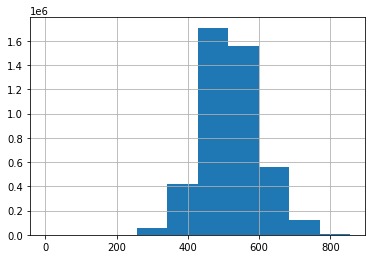

In [75]:
enem_2017['NOTA_FINAL'].hist()

# A maior NOTA FINAL no ENEM 2017 foi:

In [11]:
nota_maxima = enem_2017['NOTA_FINAL'].max()
nota_maxima

855.0

# E foi obtida por um estudante com estes dados:

In [12]:
enem_2017.loc[enem_2017['NOTA_FINAL'] == nota_maxima]

,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
668502,3,Curitiba,PR,São José dos Pinhais,1,1,1,1,853.0,831.5,724.0,927.5,940.0,G,G,Q,B,855.0


In [13]:
# enem_2017 = enem_2017.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1).reset_index()

In [14]:
# enem_2017.tail()

In [15]:
# enem_2017 = enem_2017.drop(['index'], axis=1)

In [16]:
# enem_2017.info()

# Resultado por Tipo de Escola - Questionário Sócio-Econômico.
## Tipo de escola:
### Não respondeu 1
### Pública       2
### Privada       3
### Exterior      4

#### Evidencia a melhor performance do Exterior e das Escolas Privadas, tanto na Nota Final quanto na Redação.

In [17]:
tipo_escola = enem_2017.groupby('TP_ESCOLA').mean()
tipo_escola = tipo_escola.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)

In [18]:
tipo_escola = tipo_escola.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

In [19]:
tipo_escola['TP_ESCOLA'] = tipo_escola['TP_ESCOLA'].map({
    '1':'Não respondeu',
    '2':'Pública',
    '3':'Privada',
    '4':'Exterior'},)
tipo_escola

,TP_ESCOLA,NU_NOTA_REDACAO,NOTA_FINAL
0,Exterior,697.00,626.0
1,Privada,647.50,589.5
2,Não respondeu,521.00,519.5
3,Pública,496.75,497.5


<function matplotlib.pyplot.show(*args, **kw)>

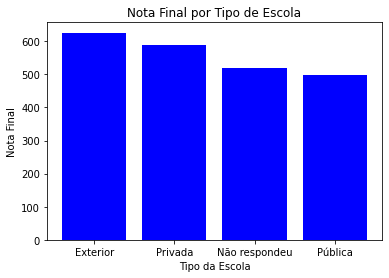

In [20]:
var_x = tipo_escola['TP_ESCOLA']
var_y = tipo_escola['NOTA_FINAL']

plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('Tipo da Escola')
plt.ylabel('Nota Final')
plt.title('Nota Final por Tipo de Escola')
plt.show

In [21]:
media_por_estado = enem_2017.groupby('SG_UF_ESC').mean()

In [22]:
media_por_estado = media_por_estado.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)

In [23]:
media_por_estado = media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

In [24]:
media_por_estado

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,543.00,537.50
1,DF,558.50,536.50
2,RJ,557.50,534.50
3,MG,549.00,532.00
4,RS,545.00,531.00
5,SP,531.50,527.50
6,PR,523.50,524.50
7,ES,535.00,523.00
8,GO,535.50,517.50
9,SE,551.50,514.00


# O estado brasileiro com a maior média no ENEM 2017 foi:

In [25]:
melhor_media_estado = media_por_estado['NOTA_FINAL'].max()
melhor_media_estado

537.5

In [26]:
media_por_estado.loc[media_por_estado['NOTA_FINAL'] == melhor_media_estado]

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,543.0,537.5


# Fonte externa: Este arquivo contem dados sobre o IDHM e IDHM(Renda), ambos para 2017, por Estado e Região Geográfica.

In [27]:
idh_estados = pd.read_excel('/content/drive/MyDrive/COLAB_DADOS/IDH_ESTADOS.xlsx')

In [28]:
idh_estados

,SG_UF_ESC,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,DF,CENTRO-OESTE,0.850,0.890
1,SP,SUDESTE,0.826,0.854
2,SC,SUL,0.808,0.866
3,RJ,SUDESTE,0.796,0.858
4,PR,SUL,0.792,0.843
5,MG,SUDESTE,0.787,0.875
6,RS,SUL,0.787,0.849
7,MT,CENTRO-OESTE,0.774,0.825
8,ES,SUDESTE,0.772,0.850
9,GO,CENTRO-OESTE,0.769,0.822


# Estas informações são então combinadas com os dados do ENEM:

In [29]:
estados_e_regioes = pd.merge(media_por_estado, idh_estados, on='SG_UF_ESC', how = 'outer')

# O estado com a melhor média de notas, nesta edição do ENEM:

In [30]:
melhor_estado = estados_e_regioes['NOTA_FINAL'].max()

In [31]:
estados_e_regioes.loc[estados_e_regioes['NOTA_FINAL'] == melhor_estado]

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,SC,543.0,537.5,SUL,0.808,0.866


In [32]:
estados_e_regioes.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,0,SC,543.00,537.50,SUL,0.808,0.866
1,1,DF,558.50,536.50,CENTRO-OESTE,0.850,0.890
2,2,RJ,557.50,534.50,SUDESTE,0.796,0.858
3,3,MG,549.00,532.00,SUDESTE,0.787,0.875
4,4,RS,545.00,531.00,SUL,0.787,0.849
5,5,SP,531.50,527.50,SUDESTE,0.826,0.854
6,6,PR,523.50,524.50,SUL,0.792,0.843
7,7,ES,535.00,523.00,SUDESTE,0.772,0.850
8,8,GO,535.50,517.50,CENTRO-OESTE,0.769,0.822
9,9,SE,551.50,514.00,NORDESTE,0.702,0.799


In [33]:
estados_e_regioes

,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,SC,543.00,537.50,SUL,0.808,0.866
1,DF,558.50,536.50,CENTRO-OESTE,0.850,0.890
2,RJ,557.50,534.50,SUDESTE,0.796,0.858
3,MG,549.00,532.00,SUDESTE,0.787,0.875
4,RS,545.00,531.00,SUL,0.787,0.849
5,SP,531.50,527.50,SUDESTE,0.826,0.854
6,PR,523.50,524.50,SUL,0.792,0.843
7,ES,535.00,523.00,SUDESTE,0.772,0.850
8,GO,535.50,517.50,CENTRO-OESTE,0.769,0.822
9,SE,551.50,514.00,NORDESTE,0.702,0.799


In [34]:
media_por_regiao = estados_e_regioes.groupby('REGIÃO').mean()

# Resultado por Região do Brasil
## Em ordem decrescente, observamos que, em média, a região Sul apresentou a melhor NOTA_FINAL, e a região Norte, a pior.

In [35]:
media_por_regiao.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,REGIÃO,NU_NOTA_REDACAO,NOTA_FINAL,IDHM(2017),IDHM Renda(2017)
0,SUL,537.0,531.0,0.795667,0.852667
1,SUDESTE,543.0,529.0,0.795250,0.859250
2,CENTRO-OESTE,528.0,517.0,0.789750,0.846000
3,NORDESTE,518.0,502.0,0.710889,0.802889
4,NORTE,490.0,489.5,0.730000,0.797571


In [36]:
media_por_estado = media_por_estado.dropna()
# O Estado da Escola foi escolhido, para comparar por escolas.

In [37]:
media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,SG_UF_ESC,NU_NOTA_REDACAO,NOTA_FINAL
0,0,SC,543.00,537.50
1,1,DF,558.50,536.50
2,2,RJ,557.50,534.50
3,3,MG,549.00,532.00
4,4,RS,545.00,531.00
5,5,SP,531.50,527.50
6,6,PR,523.50,524.50
7,7,ES,535.00,523.00
8,8,GO,535.50,517.50
9,9,SE,551.50,514.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf11b2df90>,
      dtype=object)

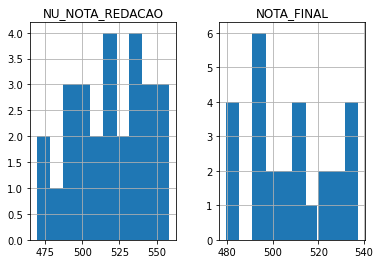

In [38]:
media_por_estado.hist()

In [39]:
media_por_cidade = enem_2017.groupby(['NO_MUNICIPIO_ESC']).mean()

In [40]:
media_por_cidade = media_por_cidade.dropna()

In [41]:
media_por_cidade.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 5276 entries, Abreu e Lima to Doutor Pedrinho
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       5276 non-null   float16
 1   NU_NOTA_CH       5276 non-null   float16
 2   NU_NOTA_LC       5276 non-null   float16
 3   NU_NOTA_MT       5276 non-null   float16
 4   NU_NOTA_REDACAO  5276 non-null   float16
 5   NOTA_FINAL       5276 non-null   float16
dtypes: float16(6)
memory usage: 242.5 KB


In [42]:
media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Ouro,553.50,591.00,546.00,578.00,688.50,591.50
1,Valinhos,560.50,576.00,555.50,609.00,602.50,583.00
2,Roca Sales,547.00,576.00,535.50,612.00,617.00,582.00
3,Florestal,561.50,574.50,543.50,607.50,620.50,582.00
4,Presidente Lucena,578.00,574.00,572.50,577.00,600.00,580.00
...,...,...,...,...,...,...,...
5271,Miguel Leão,461.50,428.50,381.25,408.00,260.00,388.00
5272,Cunhataí,457.00,429.50,432.50,417.50,272.50,386.50
5273,Nova Aliança do Ivaí,414.50,443.25,420.50,408.00,333.25,386.50
5274,Vidal Ramos,445.25,464.00,348.00,434.25,0.00,338.25


In [43]:
media_por_cidade.sample(10).reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Sertanópolis,504.25,515.00,500.25,526.00,496.75,510.75
1,Santa Maria da Serra,458.50,468.00,469.50,502.00,393.25,459.75
2,Tupaciguara,508.75,514.00,509.25,523.00,553.00,522.50
3,Dom Pedro de Alcântara,464.00,492.50,476.50,520.00,502.75,496.00
4,Cosmorama,477.00,500.00,484.75,495.25,435.00,477.75
5,Coronel João Sá,469.50,469.75,446.75,457.50,459.00,460.25
6,Prudente de Morais,526.00,505.50,501.25,502.25,506.50,510.50
7,Aparecida,489.00,500.75,503.00,505.25,504.50,502.25
8,Paracatu,505.50,511.50,501.00,522.00,519.00,514.50
9,Taquari,491.00,508.25,506.00,513.00,504.00,507.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf19272810>,
      dtype=object)

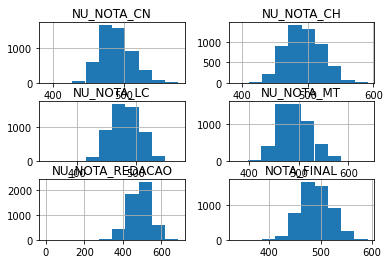

In [44]:
media_por_cidade.hist()

In [45]:
dez_melhores_cidades = media_por_cidade.nlargest(10, 'NOTA_FINAL')

In [46]:
dez_melhores_cidades.reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Ouro,553.5,591.0,546.0,578.0,688.5,591.5
1,Valinhos,560.5,576.0,555.5,609.0,602.5,583.0
2,Florestal,561.5,574.5,543.5,607.5,620.5,582.0
3,Roca Sales,547.0,576.0,535.5,612.0,617.0,582.0
4,Presidente Lucena,578.0,574.0,572.5,577.0,600.0,580.0
5,Florianópolis,567.0,568.0,549.5,601.0,588.5,579.0
6,União da Serra,538.5,533.5,536.0,608.0,671.5,577.5
7,Marinópolis,535.0,556.5,533.5,596.5,618.0,576.5
8,Santa Teresa,562.0,574.0,534.0,578.5,626.5,576.0
9,Nova Friburgo,545.0,564.0,543.0,576.5,635.0,575.0


In [47]:
dez_melhores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).head(10)

In [48]:
dez_melhores_cidades.reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Ouro,553.5,591.0,546.0,578.0,688.5,591.5
1,Valinhos,560.5,576.0,555.5,609.0,602.5,583.0
2,Roca Sales,547.0,576.0,535.5,612.0,617.0,582.0
3,Florestal,561.5,574.5,543.5,607.5,620.5,582.0
4,Presidente Lucena,578.0,574.0,572.5,577.0,600.0,580.0
5,Florianópolis,567.0,568.0,549.5,601.0,588.5,579.0
6,União da Serra,538.5,533.5,536.0,608.0,671.5,577.5
7,Marinópolis,535.0,556.5,533.5,596.5,618.0,576.5
8,Santa Teresa,562.0,574.0,534.0,578.5,626.5,576.0
9,Nova Friburgo,545.0,564.0,543.0,576.5,635.0,575.0


In [49]:
dez_piores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=True).head(10)

In [50]:
dez_piores_cidades.reset_index()

,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Bandeirante,414.00,458.00,366.75,428.75,0.00,333.50
1,Vidal Ramos,445.25,464.00,348.00,434.25,0.00,338.25
2,Nova Aliança do Ivaí,414.50,443.25,420.50,408.00,333.25,386.50
3,Cunhataí,457.00,429.50,432.50,417.50,272.50,386.50
4,Miguel Leão,461.50,428.50,381.25,408.00,260.00,388.00
5,Vitor Meireles,407.00,447.50,436.00,425.50,375.00,395.00
6,Ingazeira,435.50,421.50,440.00,409.50,348.50,400.50
7,Rio Rufino,412.50,407.75,396.75,432.75,360.00,402.00
8,Bonópolis,443.75,418.75,424.25,441.50,282.25,403.75
9,Santa Filomena do Maranhão,469.75,443.50,420.00,398.25,222.00,404.00
